# Natural Language Processing Project
Uses a a dataset of features from yelp reviews (https://www.kaggle.com/c/yelp-recsys-2013).
our goal will be to classify a review as either 1 or 5 star based on the text featuring within the review

In [1]:
# setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
yelp = pd.read_csv('data/yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


 quite a decent dataset of ten thousand entries! 

## Creating a new feature for our dataset by collecting the length of the review

In [7]:
yelp['text length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Exploratory data analysis

(0.0, 5000.0)

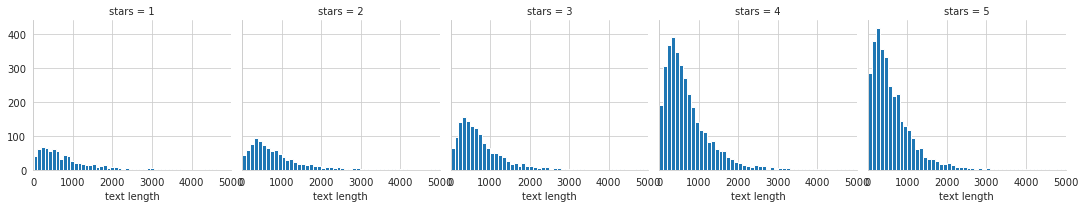

In [9]:
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text length',bins=50)
plt.xlim(0,5000)

### Observing the text length distrobutions between different star ratings-
seems to be a skew towards short length with high ratings, but there are also far more examples of high star ratings

<AxesSubplot:xlabel='stars', ylabel='text length'>

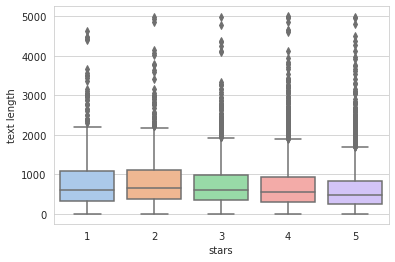

In [10]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='pastel')

slight dip in text length at higher starts but probably negligable

<AxesSubplot:xlabel='stars', ylabel='count'>

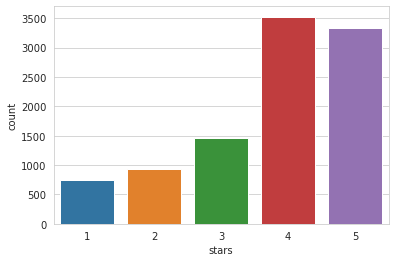

In [11]:
sns.countplot(x='stars',data=yelp)

## this proves our inference that ratings are skewed to the higher star ratings

In [12]:
yelp_stars = yelp.groupby('stars')['cool', 'useful', 'funny', 'text length'].mean() #when using groupby need agrigate fn like mean()
yelp_stars

/tmp/ipykernel_27015/3176872990.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yelp_stars = yelp.groupby('stars')['cool', 'useful', 'funny', 'text length'].mean() #when using groupby need agrigate fn like mean()


,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
corr_cat=yelp.groupby('stars')['cool', 'useful', 'funny', 'text length'].mean().corr()
corr_cat

/tmp/ipykernel_27015/2041525837.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_cat=yelp.groupby('stars')['cool', 'useful', 'funny', 'text length'].mean().corr()


,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


Looking at the mean numbers and correlation of other descriptive features of the reviews by other users

<AxesSubplot:>

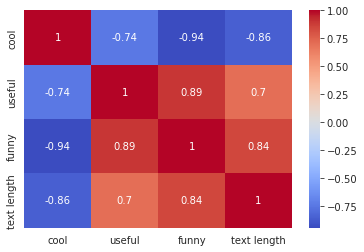

In [14]:
sns.heatmap(data=corr_cat,cmap='coolwarm', annot=True)

## NLP Classification
classifying 1 and 5 star reviews

In [15]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [16]:
X = yelp_class['text']
y = yelp_class['stars']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

CountVectorizer converts text to matrix of token counts

In [18]:
X = cv.fit_transform(X)

## Splitting our data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training model- will use a multinomial naive bayes model to classify this data

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [22]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

In [23]:
predictions = nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[156  77]
 [ 37 956]]


              precision    recall  f1-score   support

           1       0.81      0.67      0.73       233
           5       0.93      0.96      0.94       993

    accuracy                           0.91      1226
   macro avg       0.87      0.82      0.84      1226
weighted avg       0.90      0.91      0.90      1226



## This method is the standard bag of words method using pure frequency to determine which words hold priority in classifying 

# Using Text Processing- incluing TF-IDF using a pipline

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(n_estimators=200))
])

In [40]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [42]:
predictions_tfidf = pipeline.predict(X_test)

In [43]:
print(confusion_matrix(y_test, predictions_tfidf)) # Bag of words approach
print('\n')
print(classification_report(y_test, predictions_tfidf))

[[ 39 189]
 [  0 998]]


              precision    recall  f1-score   support

           1       1.00      0.17      0.29       228
           5       0.84      1.00      0.91       998

    accuracy                           0.85      1226
   macro avg       0.92      0.59      0.60      1226
weighted avg       0.87      0.85      0.80      1226



## I made the switch to a random forest classifier since the Multinomial naive bayes classifier kept having division by zero issues. Performace is still worse than the standard bag of words model. I believe a factor could also be an imbalance in sample size between our 1 star and 5 star labels leading to a biased model, as we are seeing very little recall of the model for 1 star reviews...